LEVEL 1
# Task 1: Data Exploration and Preprocessing


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load Dataset from local repository
data= pd.read_csv('E:\Restaurant\Dataset.csv')

In [3]:
# View top 5 rows of the dataset
data.head()
     

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  9551
Number of columns are:  21


In [5]:
# Dataset Duplicate Value Count
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [6]:

# Missing Values/Null Values Count
data.isnull().sum()
     

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

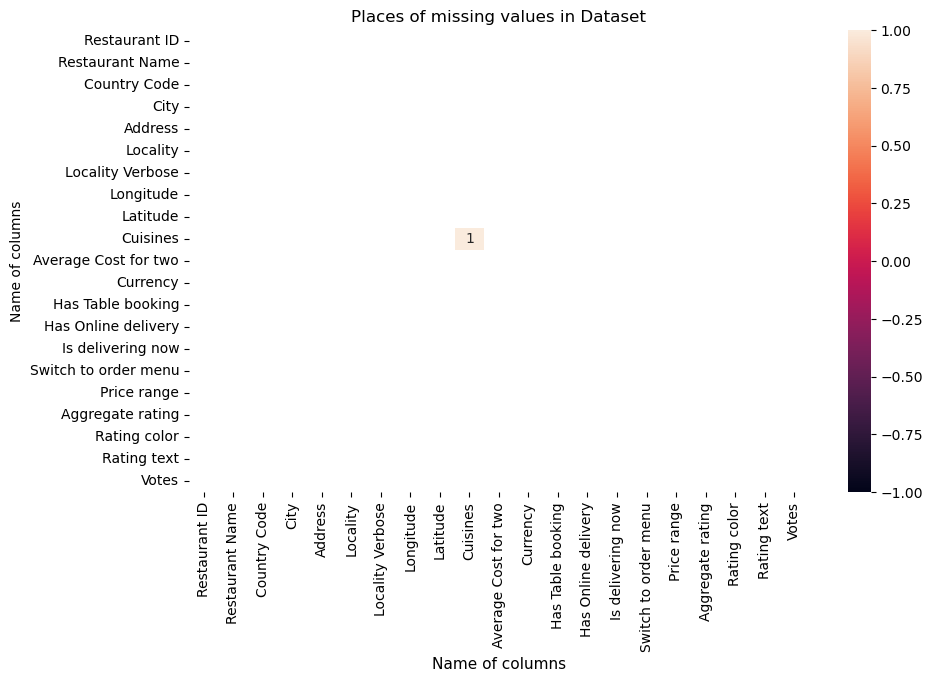

In [7]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap

# Set the plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.heatmap(data.isnull().corr(), vmin=-1, annot= True)

# Set labels
plt.xlabel('Name of columns', fontsize=11)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=12)

# To show
plt.show()
     

# Handling Missing Values

In [8]:
# If the null values number will high, then we can replace it with any placeholder value. In case if we drop them, we will loss a lot of data
# So, since Cuisines column have low number of missing values, that is only 9, i have dropping the same
data = data.dropna(subset=['Cuisines'])

In [9]:
# Checking missing values again for confirmation
print("Missing values/null values count after handling:")
data.isna().sum()

Missing values/null values count after handling:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Type Conversion

In [10]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [11]:
# Distribution of the target variable ("Aggregate rating") and identify class imbalance
target_counts = data['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


<Axes: xlabel='Rating text', ylabel='Count'>

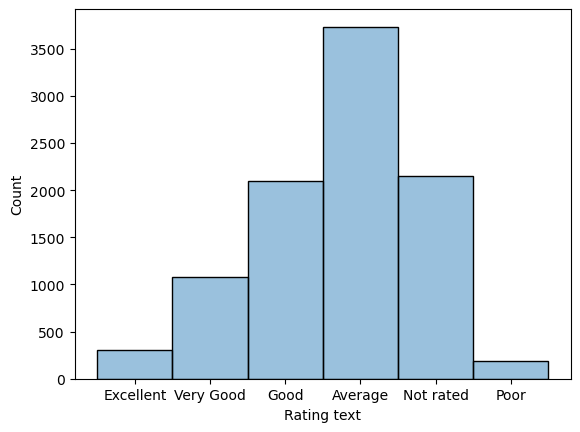

In [12]:
import seaborn as sns
sns.histplot(data['Rating text'],bins=35,alpha=0.45)

In [13]:
data['Rating text'].value_counts()

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64

# Level 1
Task 2: Descriptive Analysis

Statistical Measures for Numerical Columns

In [14]:
# Basic statistical measures (mean, median, standard deviation, etc.) for numerical columns
# Select Numerical Columns
numeric_columns = data.select_dtypes(include=['int', 'float'])

# Calculate basic statistical measures using .describe()
summary_stats = numeric_columns.describe()
print(summary_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [15]:
# Individual statistics
# Calculate mean for numerical columns
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [16]:

# Calculate median for numerical columns
median = numeric_columns.median()
print(f"\nMedian for numerical columns:\n{median}")


Median for numerical columns:
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [17]:
# Calculate standard deviation for numerical columns
std_dev = numeric_columns.std()
print(f"\nStandard deviation for numerical columns:\n{std_dev}")


Standard deviation for numerical columns:
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


# Distribution of Categorical Variables

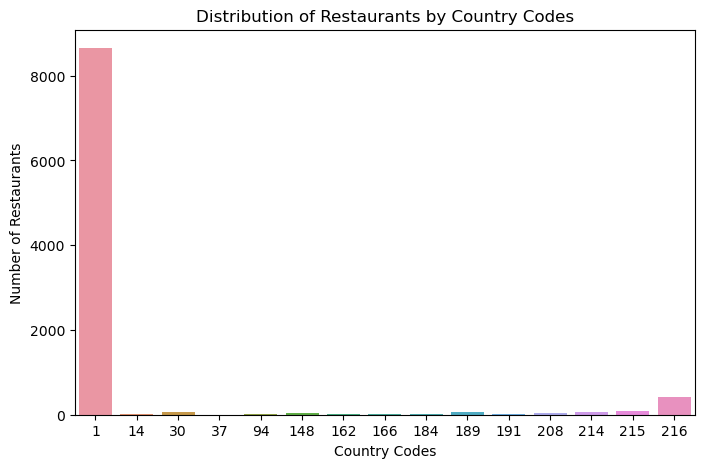

In [18]:
# Distribution of categorical variables like 'Country Code', 'City', and 'Cuisines'

# Count Plot Visualization Code for Country Codes
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
sns.countplot(x = data['Country Code'])

# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Display Char
plt.show()

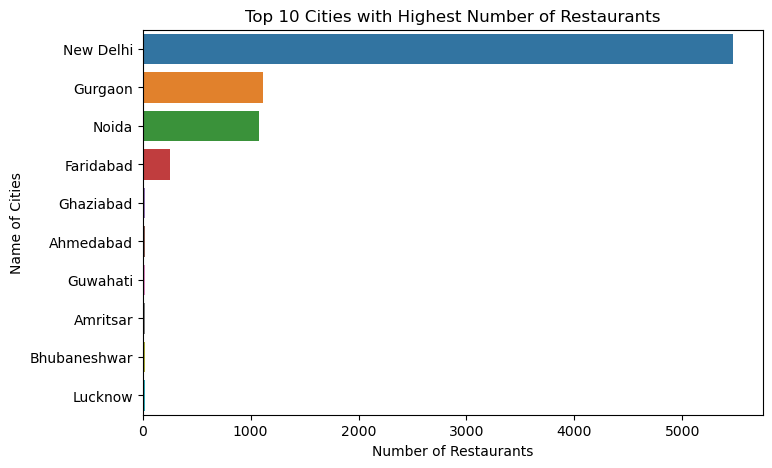

In [19]:
 #Count Plot Visualization Code for Cities
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = data['City'], order=data.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')

# Display Chart
plt.show()

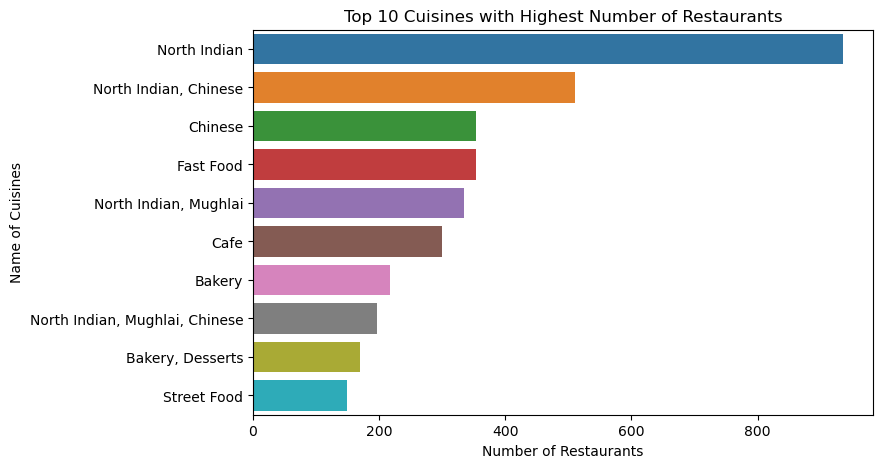

In [20]:
# Count Plot Visualization Code for Cuisines
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cuisine names present in the data, so i select only the top 10 cuisines
sns.countplot(y = data['Cuisines'], order=data.Cuisines.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

# Display Chart
plt.show()

# Top Cuisines and Cities

In [21]:

# Identify the top 10 cuisines
top_cuisines = data['Cuisines'].value_counts().head(10)

# Display the results
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [22]:

# Identify the top 10 cities
top_cities = data['City'].value_counts().head(10)

# Display the results
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: City, dtype: int64


# LEVEL 1
Task 3: Geospatial Analysis

# Visualize Locations of Restaurants

In [23]:
#!pip install shapely

In [24]:
#!pip install geopandas

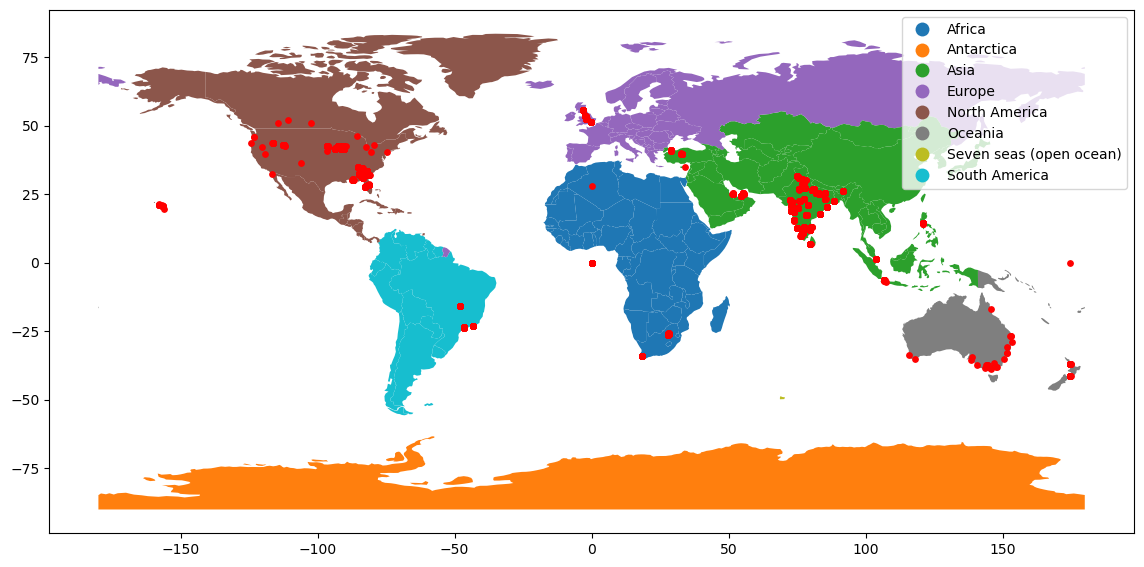

In [26]:
# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

# Distribution of Restaurants by City

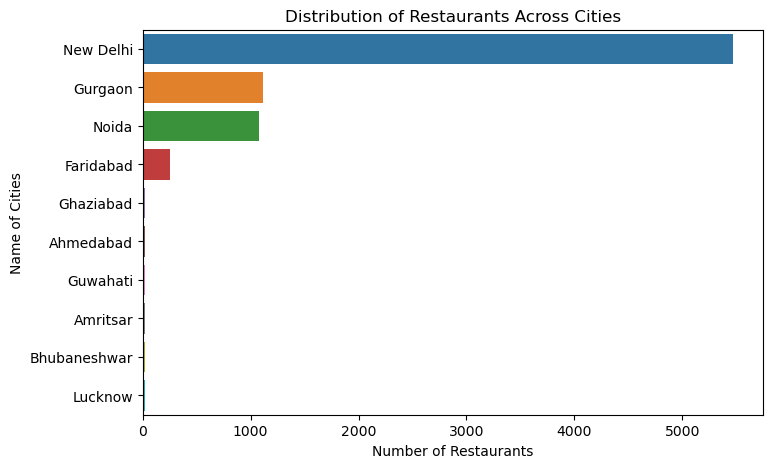

In [27]:
# Distribution of restaurants across different cities or countries
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = data['City'], order=data.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Display Chart
plt.show()

# Using pie Chart 

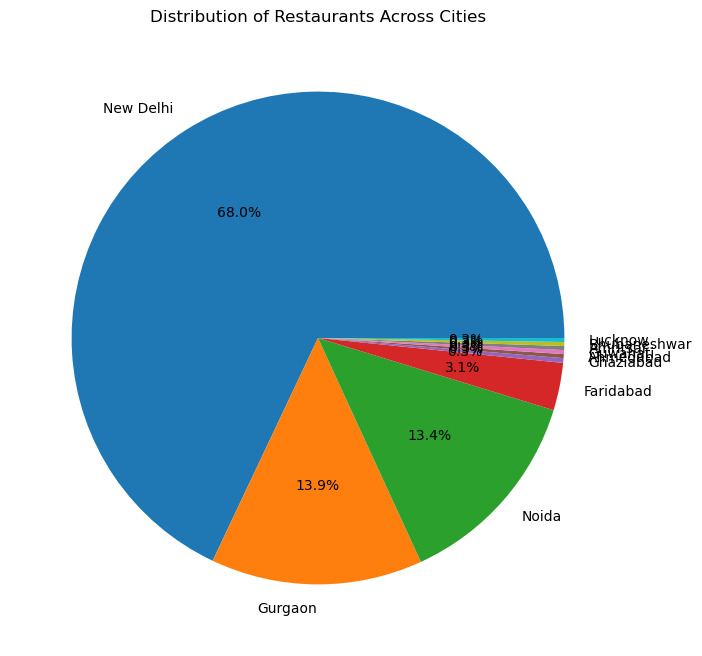

In [44]:
# Calculate the top 10 cities and their respective counts
top_cities = data['City'].value_counts().iloc[:10]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%')
plt.title('Distribution of Restaurants Across Cities')
plt.show()

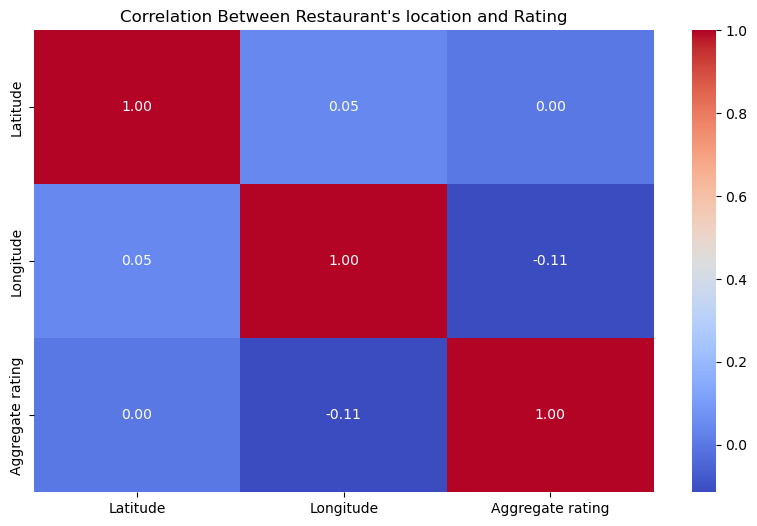

In [45]:
# Checking correlation between the restaurant's location and its rating
# Set plot size
plt.figure(figsize=(10, 6))

# Calculate the correlation between latitude, longitude, and ratings
correlation_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Create a heatmap to visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set Title
plt.title("Correlation Between Restaurant's location and Rating")

# Display Chart
plt.show()

# LEVEL 2
Task 1: Table Booking and Online Delivery

# Percentage of Table Booking and Online Delivery

In [46]:
# Percentage calculation
# Total number of restaurants
total_restaurants = len(data)

table_booking_percentage = (data['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (data['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.14%
Percentage of restaurants offering Online Delivery: 25.69%


# Restaurants with and without Table Booking

In [47]:
# Compare average ratings of restaurants with and without table booking
avg_rating_with_table = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

# Display results
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")
     

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


In [48]:
# Availability of online delivery among restaurants with different price ranges
# Select price ranges
price_ranges = data['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = data.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

# Display results
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858277  0.141723
Medium                0.566209  0.433791


# LEVEL 2
Task 2: Price Range Analysis
Most Common Price Range

In [49]:
# Determining the most common price range among all the restaurants
most_common_price_range = data['Price range'].mode()[0]

# Display result
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


# Average Rating for Each Price Range

In [50]:
# Group by 'Price range' and calculate the average rating
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()

# Display result
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    1.997
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


# Highest Average Rating Among Different Price Ranges

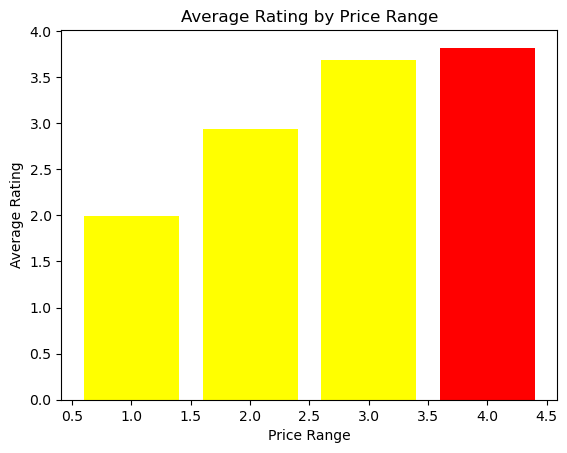

In [51]:
# Find the price range with the highest average rating
highest_avg_rating_color = avg_rating_by_price_range.idxmax()

# Create the bar plot
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='yellow')

# Set the color of the bar corresponding to the highest average rating to a distinct color (e.g., red)
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='red')

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

# Highlight the bar for the highest average rating
plt.show()

# LEVEL 2
Task 3: Feature Engineering

In [53]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address
# Create a new column for the length of restaurant names
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)

# Create a new column for the length of restaurant addresses
data['Address Length'] = data['Address'].apply(len)

# Display the updated DataFrame
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [54]:
# Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
# Create new binary columns
data['Has Table Booking'] = np.where(data['Has Table booking'] == 'Yes', 1, 0)
data['Has Online Delivery'] = np.where(data['Has Online delivery'] == 'Yes', 1, 0)

# Drop the original categorical columns if needed
# data= data.drop(['Has Table booking', 'Has Online delivery'], axis=1)

# Display the updated DataFrame
data.head()
     

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


# LEVEL 3 
Task 1: Predictive Modeling

# Build a Regression Model

In [55]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
     

In [56]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)
     

In [57]:
#  features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = data[features]
y = data[target]

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with Different Algorithms

In [60]:
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6275791725010238
R-squared: 0.2892767308287971
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20407546701517895
R-squared: 0.9108853286370149
---------------------------
Model: Random Forest
Mean Squared Error: 0.13008127465064878
R-squared: 0.9431967486806802
---------------------------


# LEVEL 3
Task 2: Customer Preference Analysis

# Relationship Between the Type of Cuisine and the Restaurant's Rating

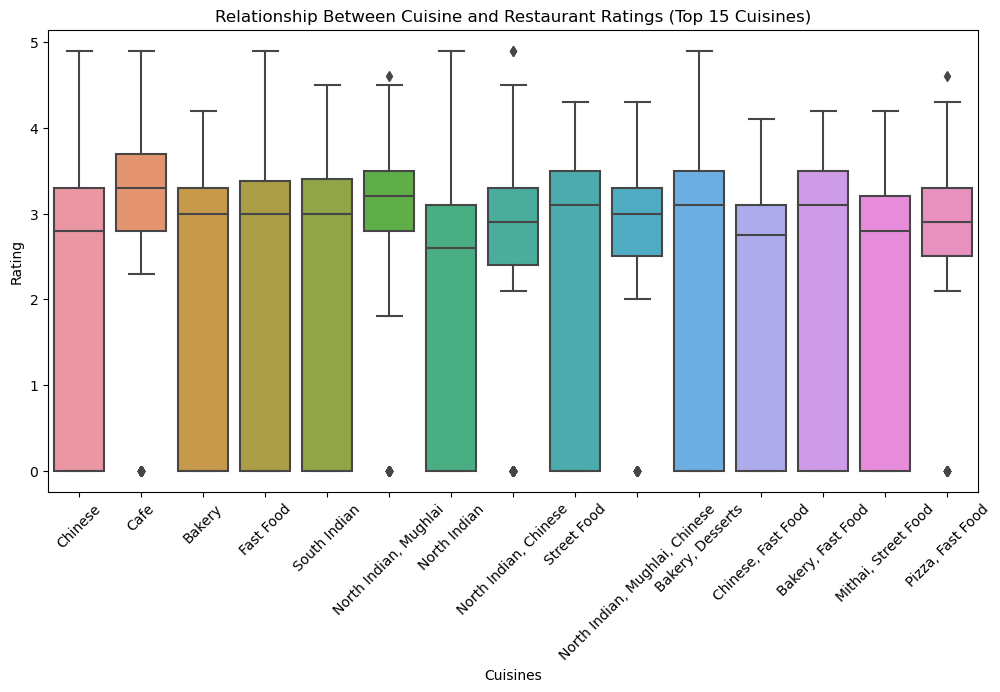

In [61]:
# There are many cuisine names present in the data, so i select only the top 15 cuisines
top_n = 15
top_cuisines = data['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
data_filtered = data[data['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

# Most Popular Cuisines by Number of Votes

In [62]:
# Identifying most popular cuisines based on number of votes
top_cuisines = data.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


# Cusines with Higher Ratings

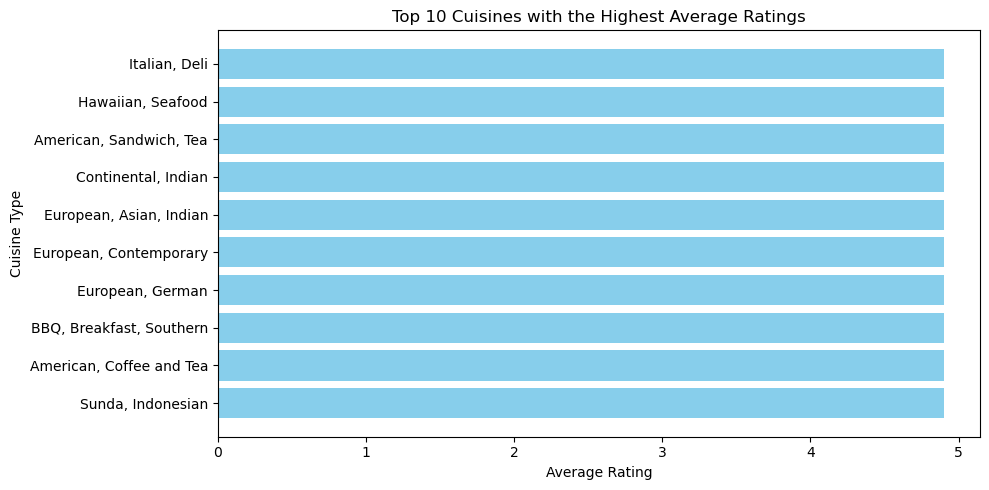

In [63]:
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

# LEVEL 3
Task 3: Data Visualization

# Distribution of Ratings

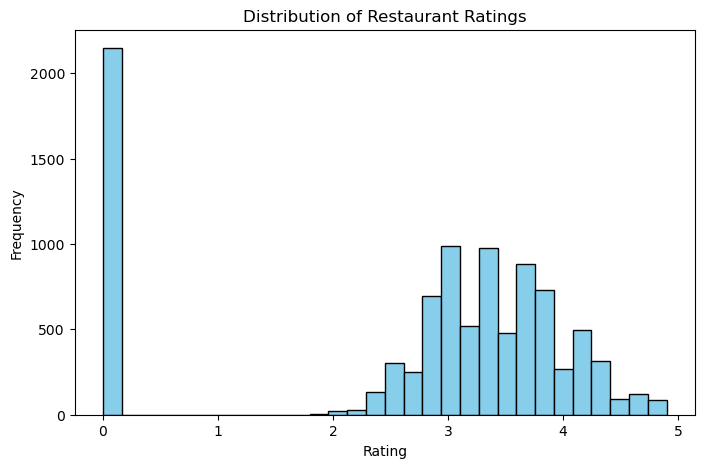

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(data['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()

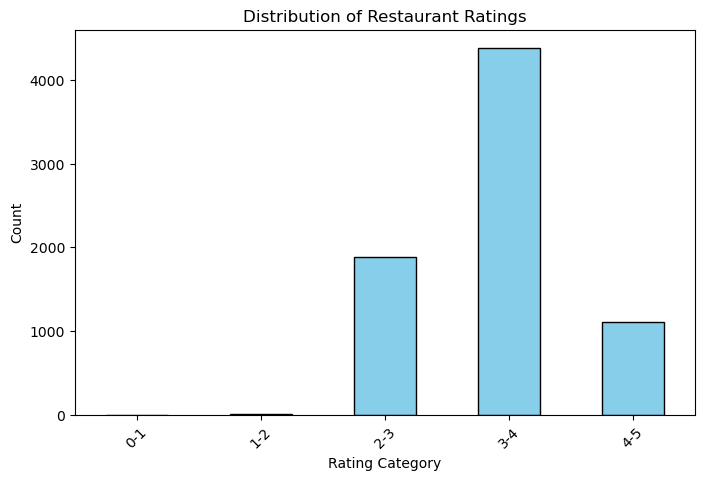

In [67]:
# Distribution of ratings by using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
data['Rating Category'] = pd.cut(data['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = data['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()
     

# Comparing Average Ratings for Different Cuisines

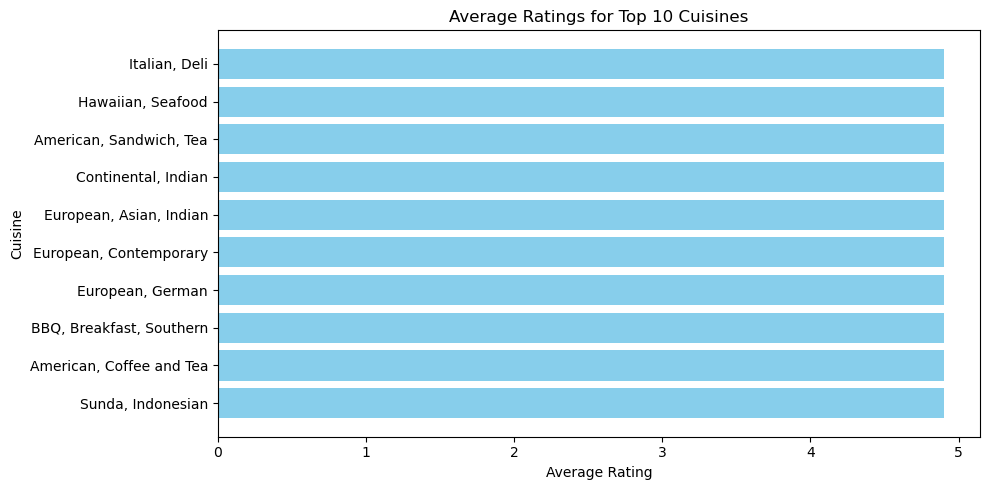

In [68]:
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

# Comparing Average Ratings for Different Cities

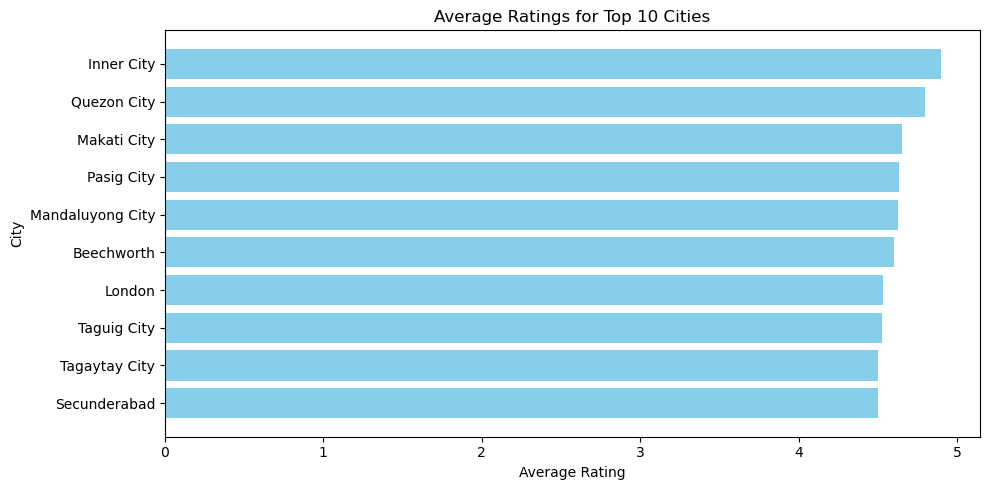

In [69]:
# Group the data by city and calculate the average rating for each city
city_ratings = data.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

# Relationship Between Various Features and the Target Variable

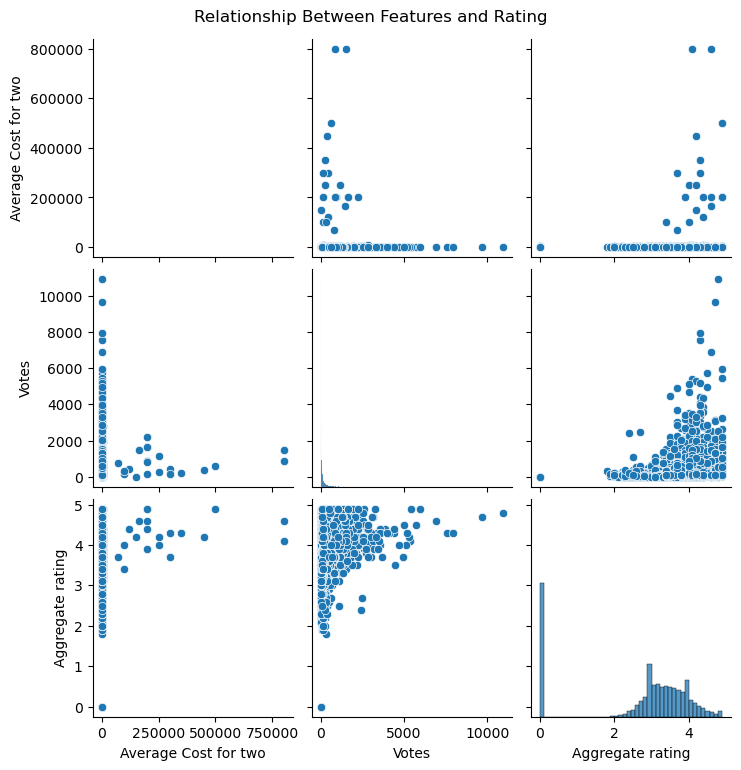

In [70]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=data, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()